# Построение нейронной сети средствами Keras

In [39]:
!pip install numpy tensorflow tensorflow_datasets
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf

#import tensorflow_datasets as tfds
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics


Загрузка данных. 

Целевая переменная -- MPG. 

Метрика для оценки модели -- MAE.

In [13]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [14]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [15]:
#raw_dataset.duplicated()
duplicateRows = raw_dataset[raw_dataset.duplicated ()]
print(duplicateRows)

Empty DataFrame
Columns: [MPG, Cylinders, Displacement, Horsepower, Weight, Acceleration, Model Year, Origin]
Index: []


In [17]:

dataset = raw_dataset.dropna().drop(['Origin'], axis=1)
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82
394,44.0,4,97.0,52.0,2130.0,24.6,82
395,32.0,4,135.0,84.0,2295.0,11.6,82
396,28.0,4,120.0,79.0,2625.0,18.6,82


In [38]:
# создаем обучающие и тренировочные выборки
X = dataset.drop(['MPG'], axis=1)
y = dataset['MPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
260,6,225.0,110.0,3620.0,18.7,78
184,4,140.0,92.0,2572.0,14.9,76
174,6,171.0,97.0,2984.0,14.5,75
64,8,318.0,150.0,4135.0,13.5,72
344,4,86.0,64.0,1875.0,16.4,81
...,...,...,...,...,...,...
72,8,304.0,150.0,3892.0,12.5,72
107,6,232.0,100.0,2789.0,15.0,73
272,4,151.0,85.0,2855.0,17.6,78
352,4,98.0,65.0,2380.0,20.7,81


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = tf.constant(scaler.fit_transform(X_train), dtype=tf.float32) 
X_test_scaled = tf.constant(scaler.transform(X_test), dtype=tf.float32) 
y_train = tf.constant(y_train, dtype=tf.float32, shape=(len(X_train), 1))
y_test = tf.constant(y_test, dtype=tf.float32)

Строим модель. По заданию просят использовать 2 скрытых слоя. Выходной слой будет содержать 1 нейрон с линейной функцией активации, так как мы решаем задачу регрессии.

In [54]:

keras.backend.clear_session()

# В качестве функции активации скрытых слоев будем использовать ReLU
model = Sequential([
      Dense(5, activation='relu'),
      Dense(2, activation='relu'),
      Dense(1)
  ])

# В качестве loss используем MAE, так как решаем задачу регрессии
# Оптимизатор -- Adam
model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.02))

Обучаем модель 

In [55]:

history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=80)

Предсказания на тестовой выборке

In [56]:
from sklearn.metrics import mean_absolute_error
results = model.predict(X_test_scaled)
mean_absolute_error(y_test, results)

3/3 [==============================] - 0s 2ms/step


1.855888656423062

Построим график, чтобы оценить не произошло ли недо/переобучение.

In [57]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

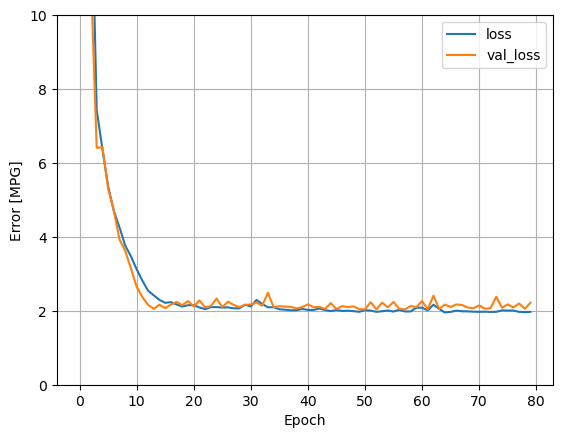

In [58]:
plot_loss(history)

По графику видно, что 12 эпохи бы более чем хватило.